In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('stats.csv')

In [3]:
df.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [4]:
df1 = df.groupby(['team']).sum() # group each team and aggregate the totals for each season
df1.head()

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
team,,,,,,,,,,,,,,,,,,,,,
AFC Bournemouth,34.0,50.0,145.0,160.0,5.0,1381.0,461.0,37.0,20.0,13.0,...,7449.0,2084.0,632.0,73726.0,80.0,12.0,1268.0,5.0,131.0,53.0
Arsenal,255.0,94.0,861.0,685.0,40.0,7339.0,2652.0,206.0,143.0,52.0,...,22985.0,10270.0,2953.0,347034.0,480.0,41.0,6011.0,11.0,678.0,269.0
Aston Villa,113.0,150.0,449.0,651.0,26.0,4561.0,1467.0,101.0,89.0,36.0,...,13225.0,8762.0,2061.0,221450.0,202.0,59.0,3976.0,5.0,585.0,231.0
Birmingham City,29.0,48.0,121.0,201.0,7.0,1267.0,419.0,24.0,19.0,10.0,...,2221.0,2294.0,529.0,64871.0,30.0,20.0,1371.0,1.0,226.0,67.0
Blackburn Rovers,72.0,97.0,277.0,411.0,28.0,2876.0,927.0,70.0,65.0,22.0,...,3492.0,4842.0,1120.0,127563.0,81.0,42.0,2076.0,8.0,327.0,156.0


Text(0,0.5,'Premier League Goals')

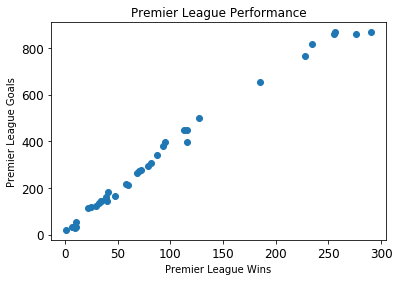

In [5]:
plt.scatter(df1.wins, df1.goals)
plt.title('Premier League Performance',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Premier League Wins')
plt.ylabel('Premier League Goals')

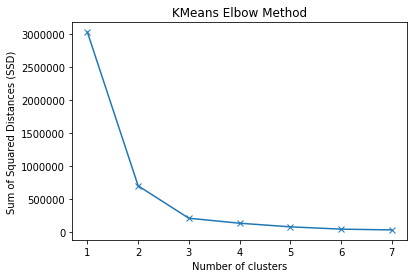

In [6]:
x = df1[['wins','goals']]

def no_clusters(data,a,b):
    '''to find the number of clusters for the k means algorithm'''
    SSE = []
    clusters = range(a,b)
    for k in clusters:
        SSE.append(KMeans(n_clusters=k).fit(data).inertia_)
    plt.plot(clusters, SSE, '-x')
    plt.xticks(clusters)
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.title('KMeans Elbow Method')
    plt.rcParams['figure.figsize']=(8,7)
    
no_clusters(x,1,8)

In [7]:
kM2 = KMeans(n_clusters=2, random_state = 1)
df1['KMeans2'] = kM2.fit_predict(x)

KMeans2 split
0    32
1     7
Name: KMeans2, dtype: int64


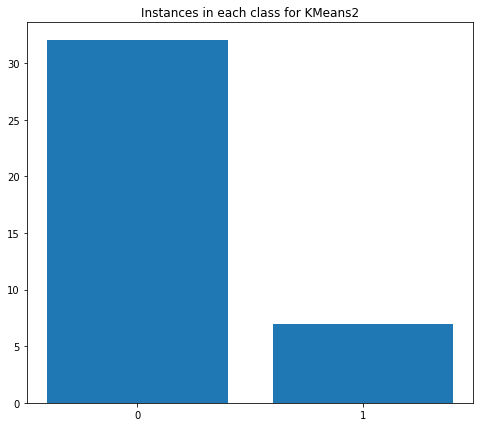

In [8]:
def no_instances(data,Class):
    print(str(Class)+ ' split')
    no_class = pd.value_counts(data[Class]).sort_index()
    print(no_class)
    plt.bar(no_class.index, no_class, align = 'center')
    plt.title('Instances in each class for '+str(Class))
    plt.xticks(no_class.index)
    plt.savefig(str(Class)+'.png')
    plt.show()
    print('\n')
    
no_instances(df1,'KMeans2')

Text(0,0.5,'Premier League Goals')

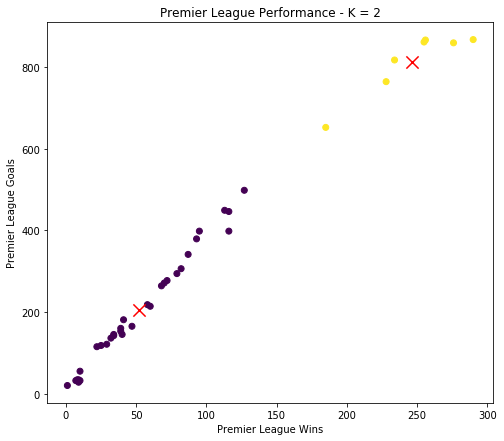

In [9]:
centroids2 = kM2.cluster_centers_
plt.scatter(df1['wins'], df1['goals'], c = df1.KMeans2) 
plt.scatter(centroids2[:,0],centroids2[:,1], marker = 'x', s = 150, linewidths = 5, c = 'r')
plt.title('Premier League Performance - K = 2')
plt.xlabel('Premier League Wins')
plt.ylabel('Premier League Goals')

Here, we can see the teams that are in the top right (considered as top performers). 

In [10]:
df1.loc[df1.wins > 150]

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,KMeans2
team,,,,,,,,,,,,,,,,,,,,,
Arsenal,255.0,94.0,861.0,685.0,40.0,7339.0,2652.0,206.0,143.0,52.0,...,10270.0,2953.0,347034.0,480.0,41.0,6011.0,11.0,678.0,269.0,1
Chelsea,276.0,79.0,859.0,715.0,41.0,7882.0,2667.0,170.0,141.0,60.0,...,10359.0,2919.0,326987.0,349.0,48.0,5418.0,5.0,775.0,260.0,1
Everton,185.0,130.0,652.0,673.0,31.0,6153.0,2086.0,140.0,135.0,47.0,...,10389.0,2518.0,286851.0,330.0,54.0,5500.0,10.0,700.0,254.0,1
Liverpool,234.0,103.0,817.0,643.0,23.0,7868.0,2606.0,227.0,115.0,57.0,...,10435.0,3027.0,331509.0,400.0,29.0,5408.0,12.0,516.0,298.0,1
Manchester City,256.0,107.0,866.0,731.0,36.0,7175.0,2502.0,178.0,88.0,65.0,...,9515.0,2942.0,329279.0,464.0,47.0,5545.0,14.0,542.0,324.0,1
Manchester United,290.0,77.0,867.0,722.0,29.0,7200.0,2530.0,185.0,141.0,52.0,...,11329.0,2908.0,332996.0,380.0,41.0,5520.0,5.0,471.0,202.0,1
Tottenham Hotspur,228.0,116.0,764.0,689.0,27.0,7405.0,2532.0,166.0,97.0,46.0,...,10306.0,2905.0,315976.0,395.0,46.0,5906.0,7.0,570.0,366.0,1
